In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
fb=pd.read_csv ("/Users/tatabovanenko/Desktop/Tata's Folder/Python/GoIt/facebook_ads_data.csv", parse_dates = ['ad_date'])
fb

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


In [3]:
fb_2021 = fb[fb['ad_date'].dt.year == 2021]

In [4]:
daily_ad_costs_2021 = fb_2021.groupby(fb_2021['ad_date'].dt.date)['total_spend'].sum()

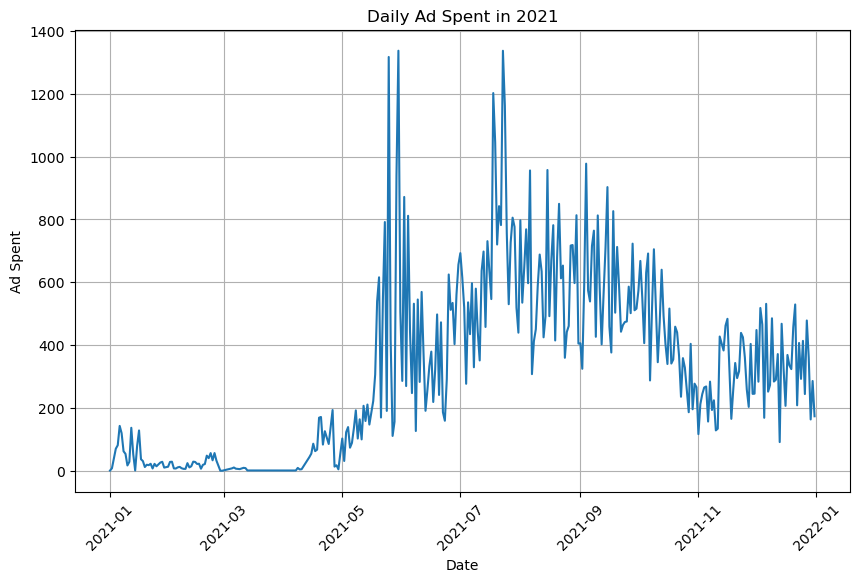

In [5]:
plt.figure(figsize=(10, 6))
daily_ad_costs_2021.plot(kind='line', title='Daily Ad Spent in 2021')
plt.xlabel('Date')
plt.ylabel('Ad Spent')
plt.xticks(rotation=45)
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

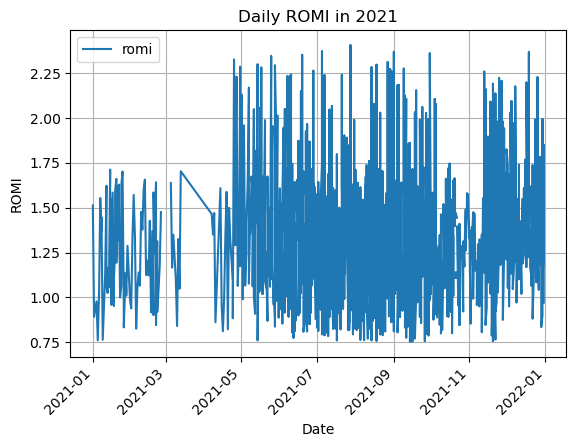

In [6]:
plt.figure(figsize=(10, 6))
fb_2021.plot(x='ad_date', y='romi', kind='line', title='Daily ROMI in 2021')
plt.xlabel('Date')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [7]:
campaign_data = fb.groupby('campaign_name').agg({'total_spend': 'sum', 'total_value': 'sum'})

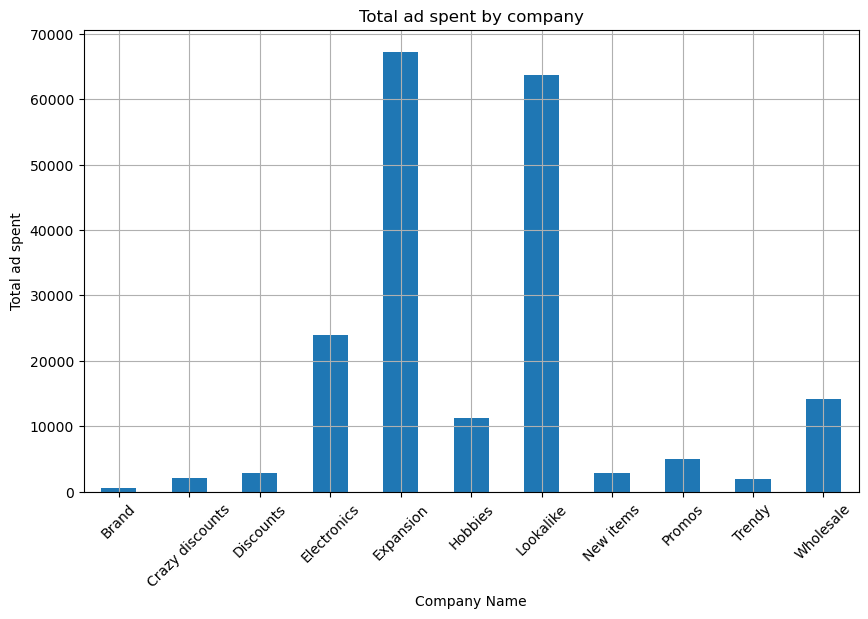

In [8]:
plt.figure(figsize=(10, 6))
campaign_data['total_spend'].plot(kind='bar', title='Total ad spent by company')
plt.xlabel('Company Name')
plt.ylabel('Total ad spent')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [9]:
campaign_grouped = fb.groupby('campaign_name')['romi'].sum().reset_index()

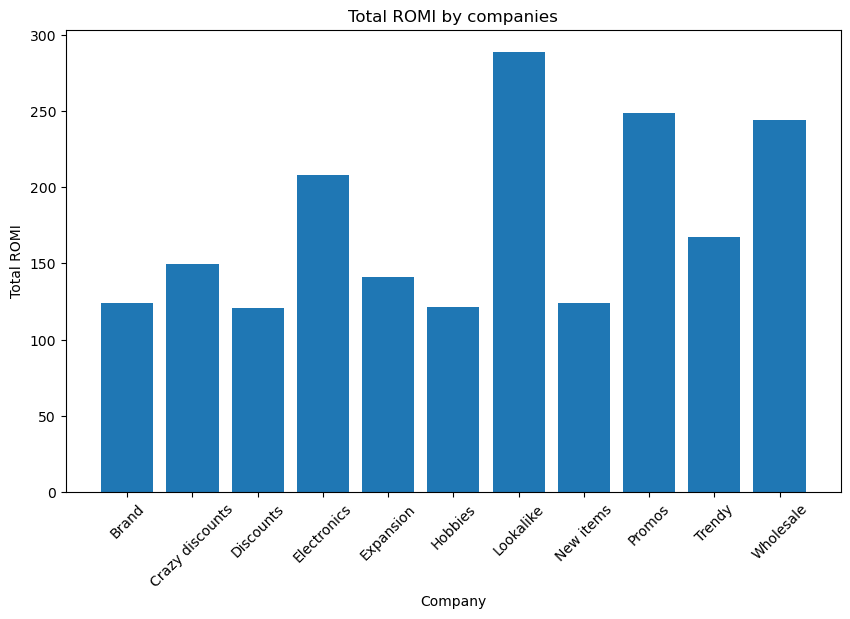

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(campaign_grouped['campaign_name'], campaign_grouped['romi'])
plt.xlabel("Company")
plt.ylabel("Total ROMI")
plt.title("Total ROMI by companies")
plt.xticks(rotation=45)
plt.show()


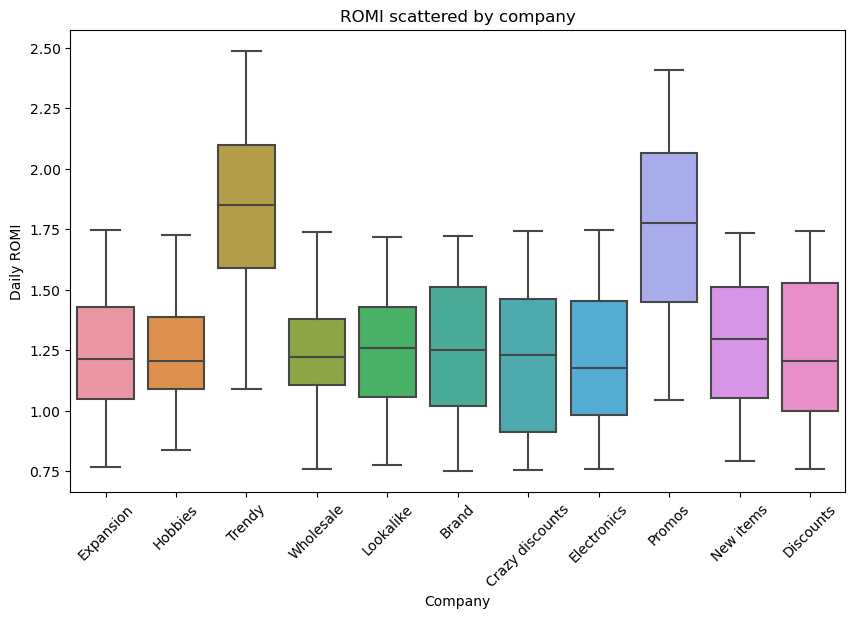

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='campaign_name', y='romi', data=fb)
plt.xlabel("Company")
plt.ylabel("Daily ROMI")
plt.title("ROMI scattered by company")
plt.xticks(rotation=45)
plt.show()


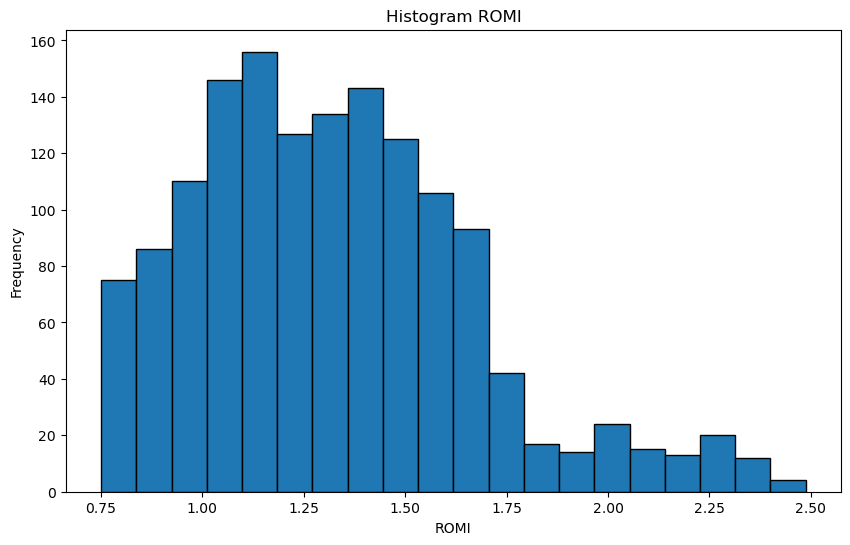

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(fb["romi"], bins=20, edgecolor="k")
plt.xlabel("ROMI")
plt.ylabel("Frequency")
plt.title("Histogram ROMI")
plt.show()

In [13]:
correlation_matrix = fb.corr(numeric_only=True)

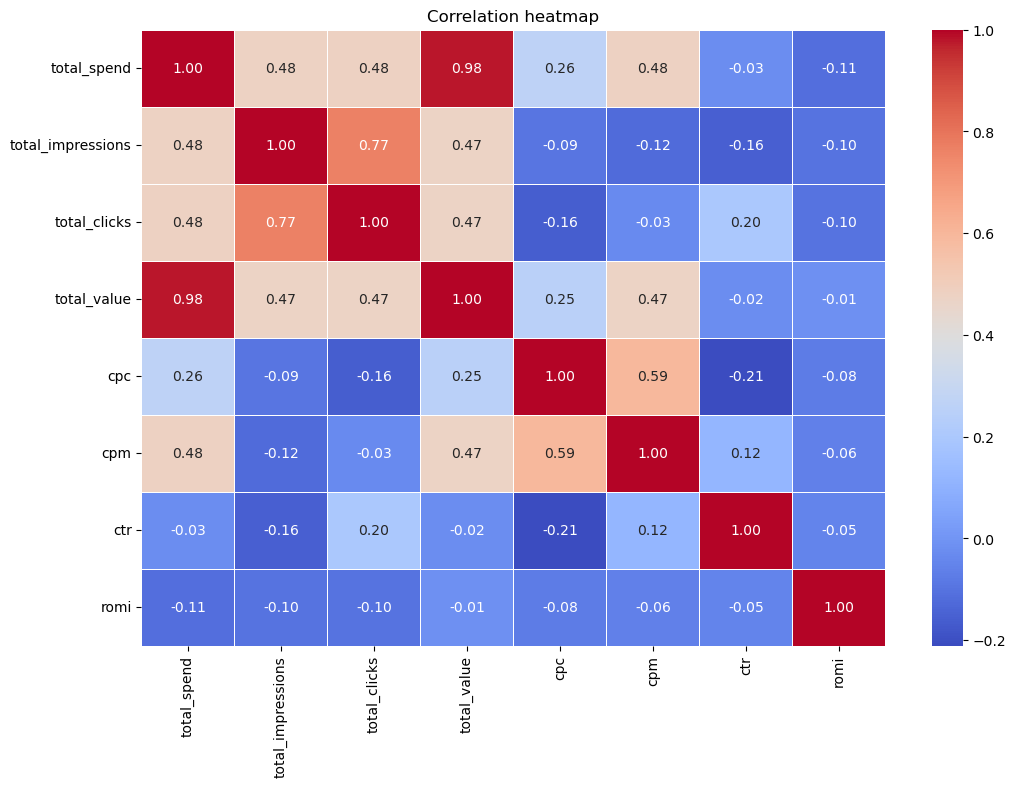

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation heatmap")
plt.show()

/Users/tatabovanenko/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

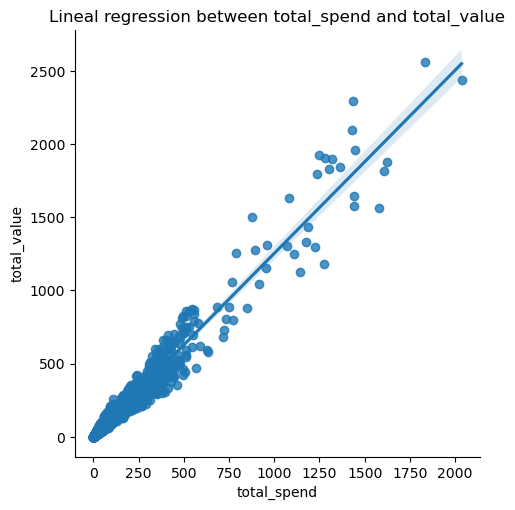

In [15]:
plt.figure(figsize=(10, 6))
sns.lmplot(x="total_spend", y="total_value", data=fb)
plt.title("Lineal regression between total_spend and total_value")
plt.xlabel("total_spend")
plt.ylabel("total_value")
plt.show()